In [5]:
images_path='/Users/yoavfreund/datasets/poverty_v1.1/partitioned_images2/'
_dir='urban/country2/'
band_names=['Red','Green','Blue','NIR','SWIR1','SWIR2','TEMP1','NL']

In [6]:
%pylab inline
from glob import glob
from numpy import load

path=images_path+_dir
path

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'/Users/yoavfreund/datasets/poverty_v1.1/partitioned_images2/urban/country2/'

In [7]:
files=glob(f'{path}*.npz')
len(files)

192

/var/folders/cl/mbdp3zfx4cg9mmnz60g052540000gn/T/ipykernel_53954/1957526819.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=[14,8])


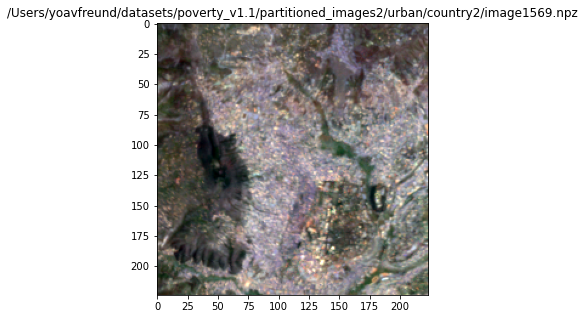

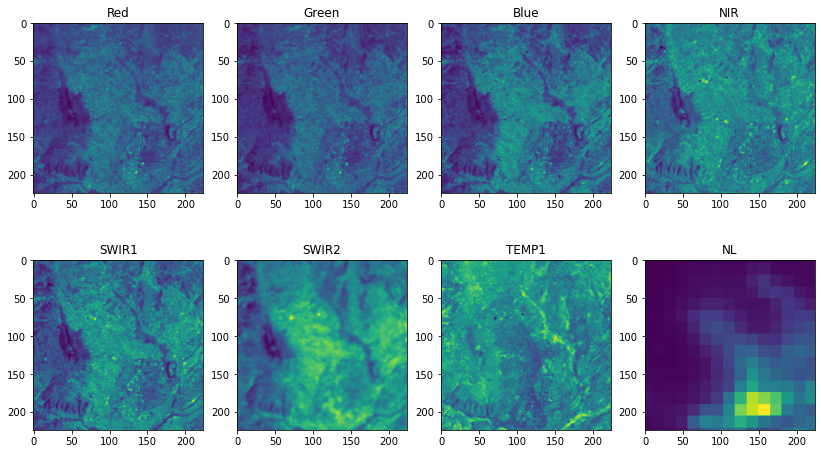

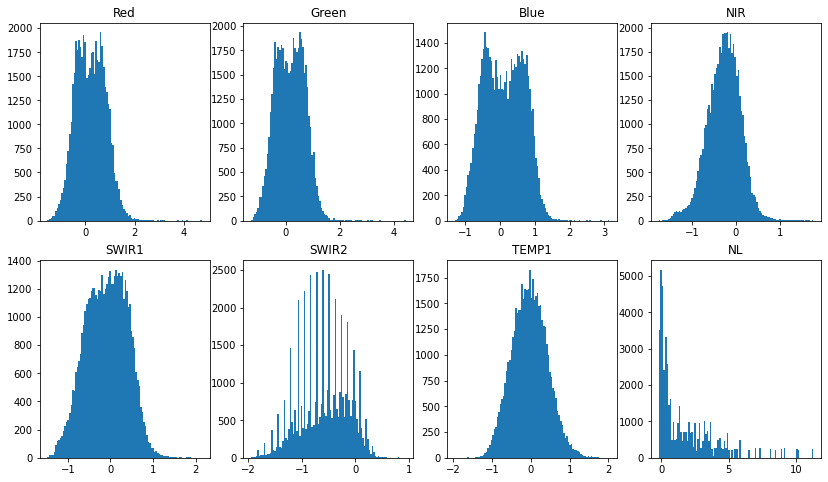

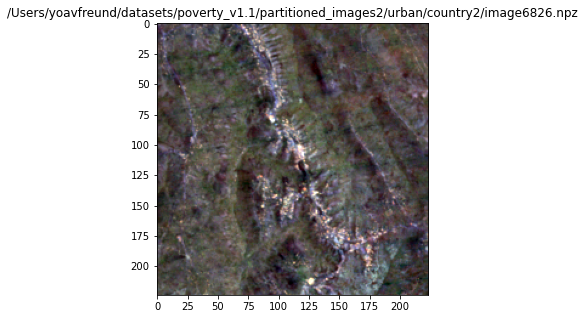

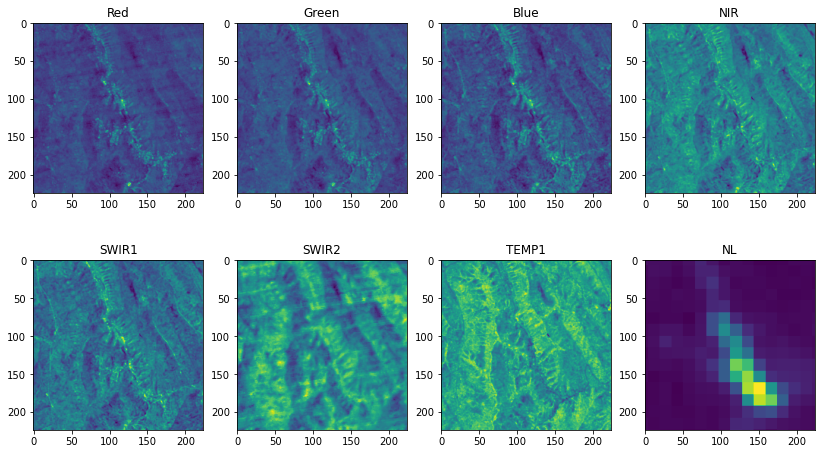

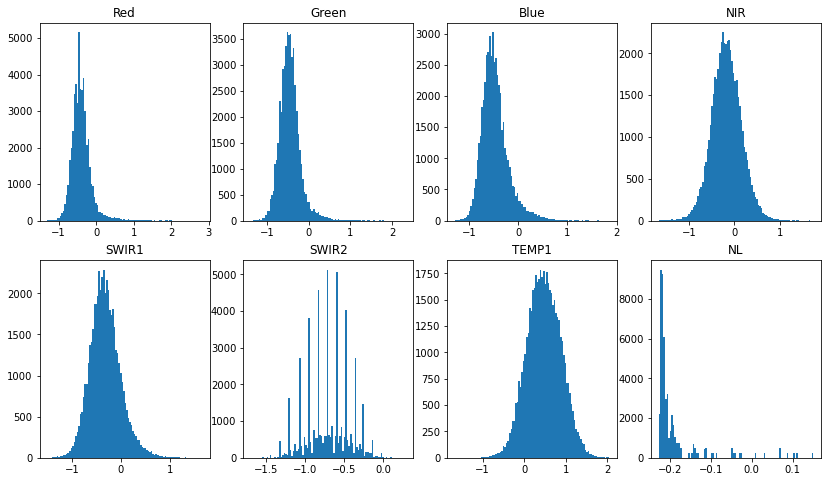

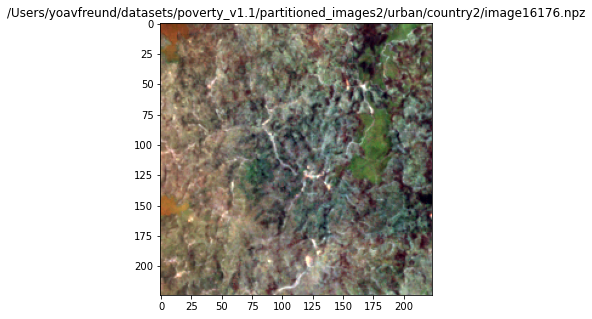

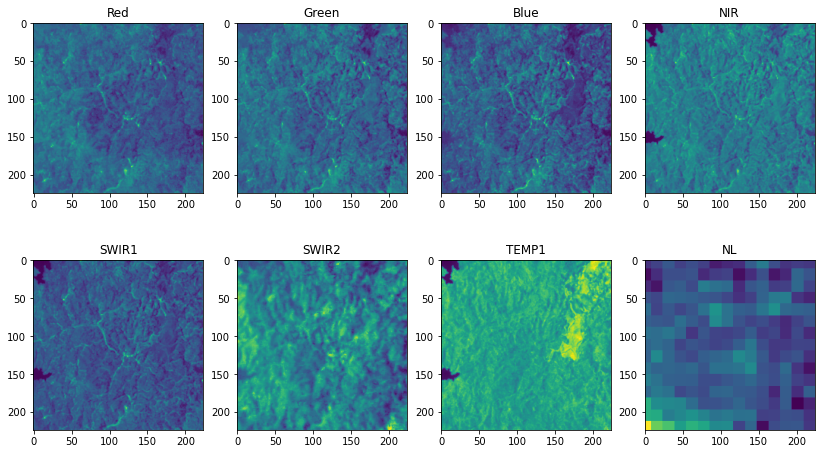

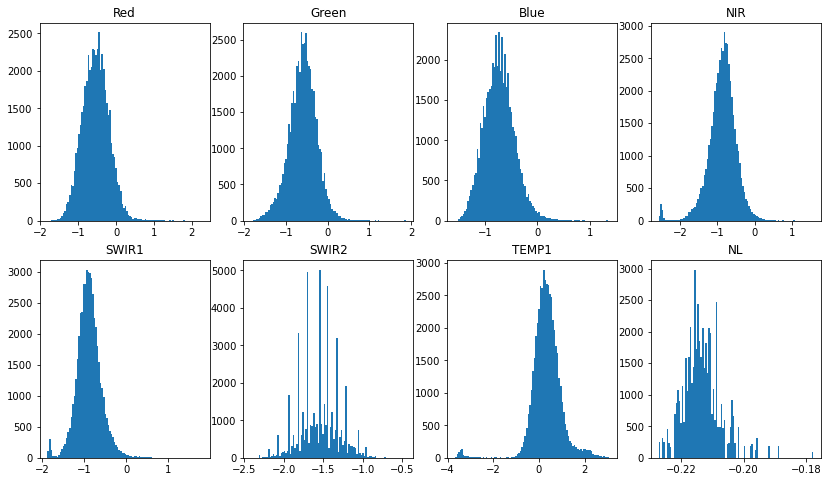

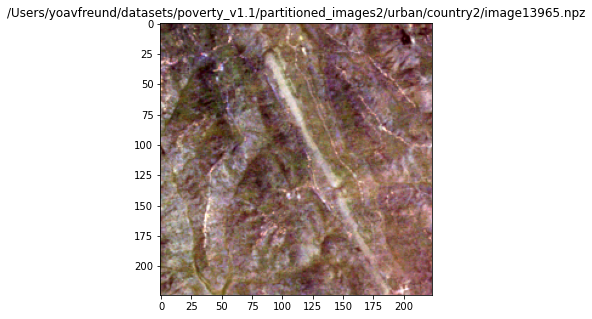

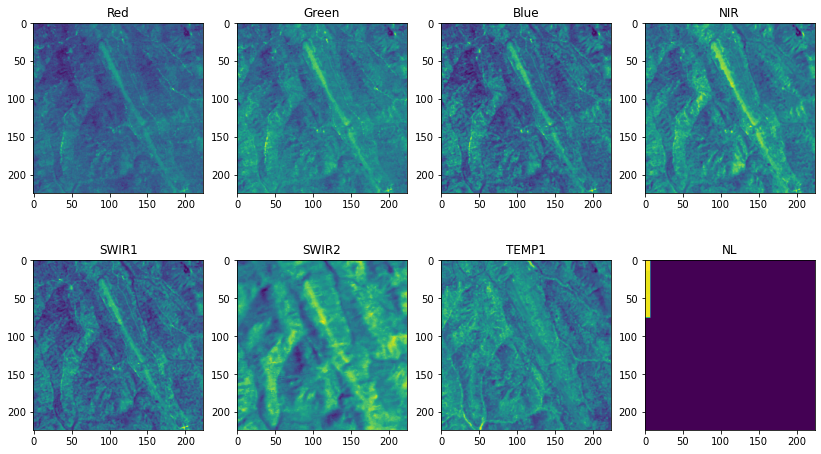

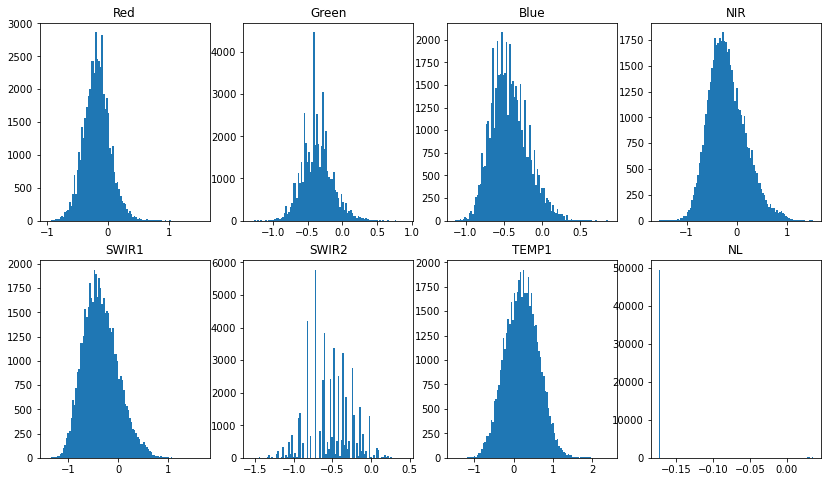

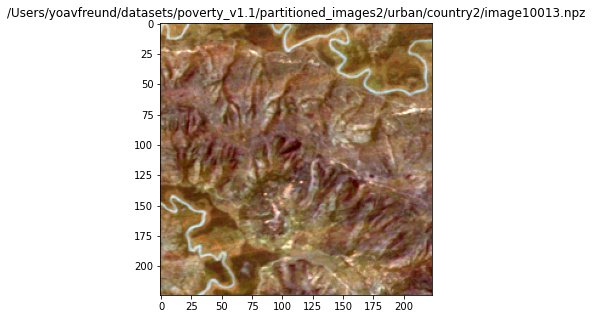

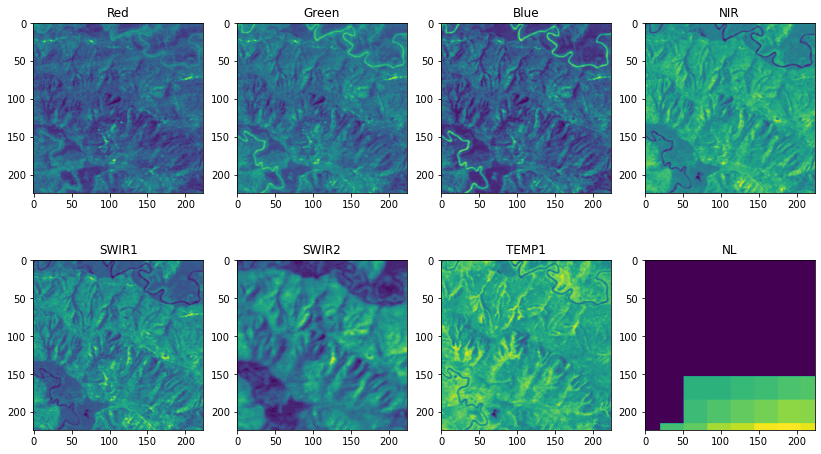

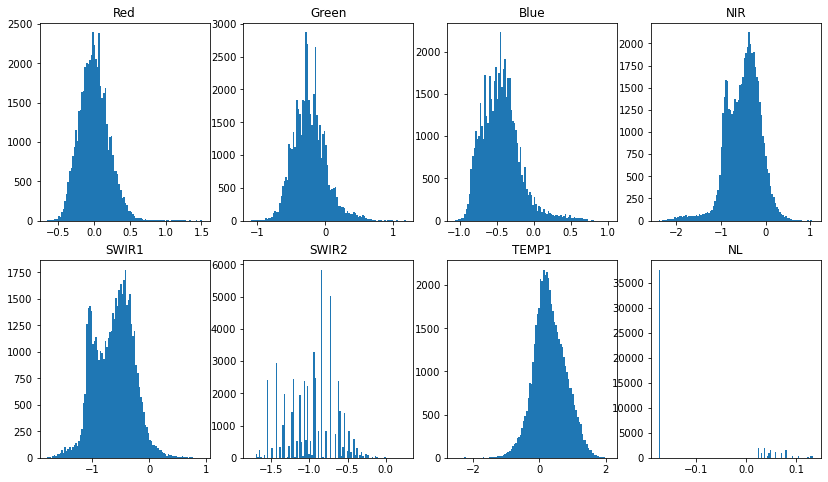

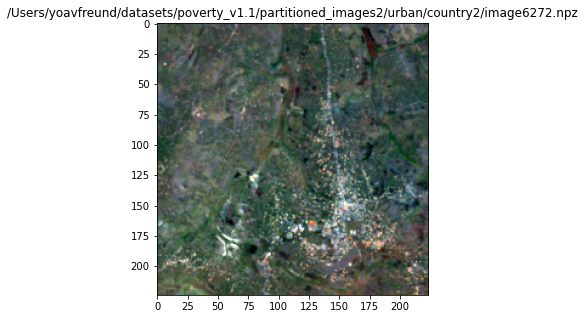

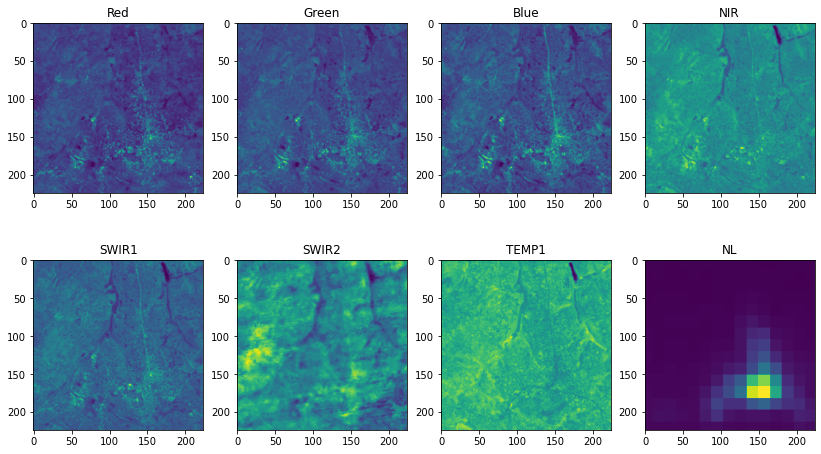

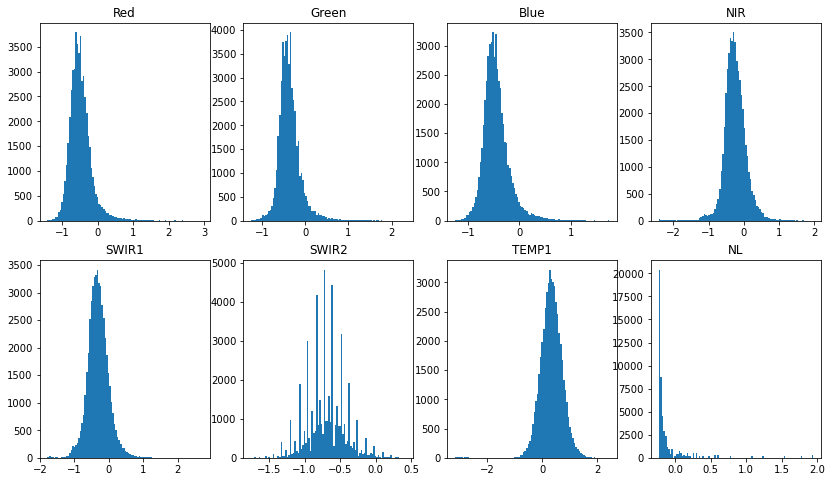

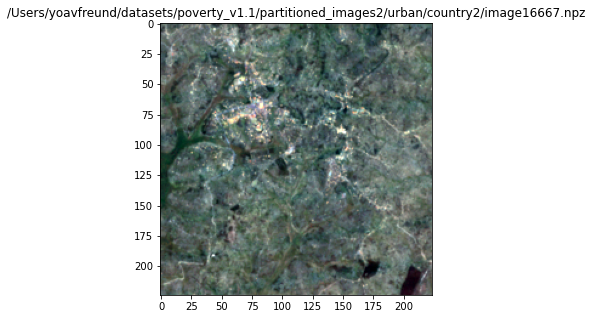

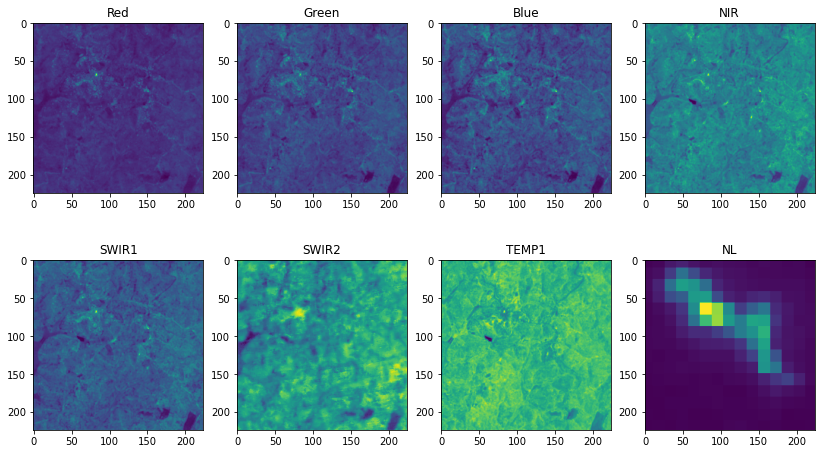

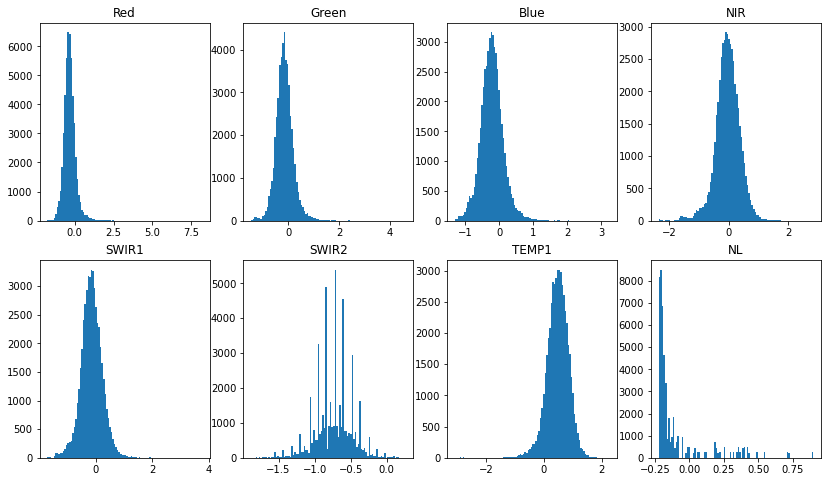

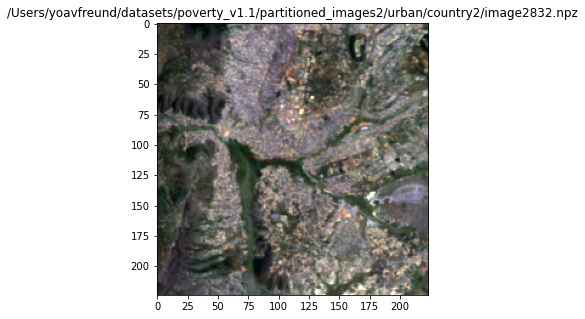

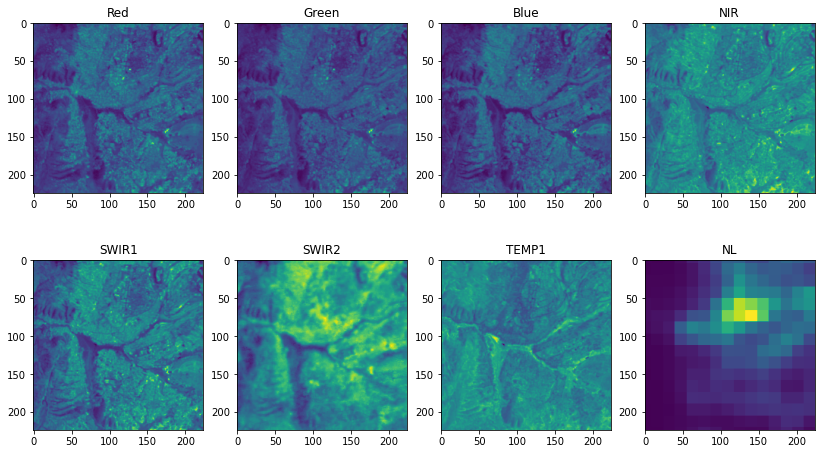

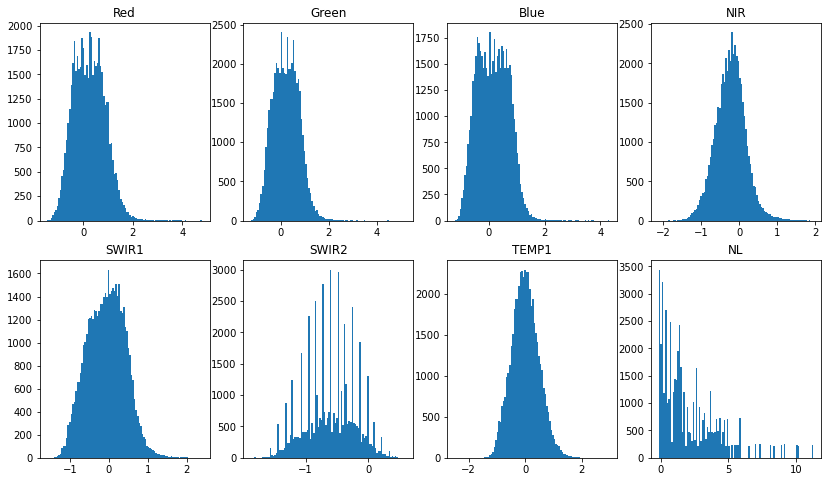

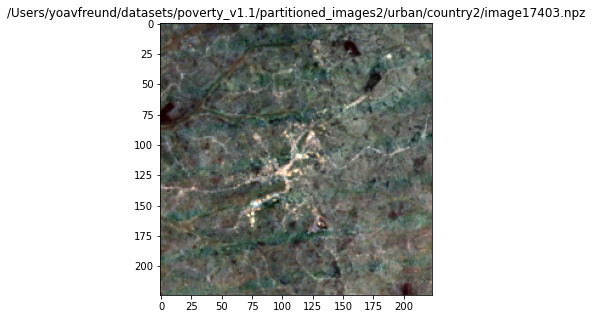

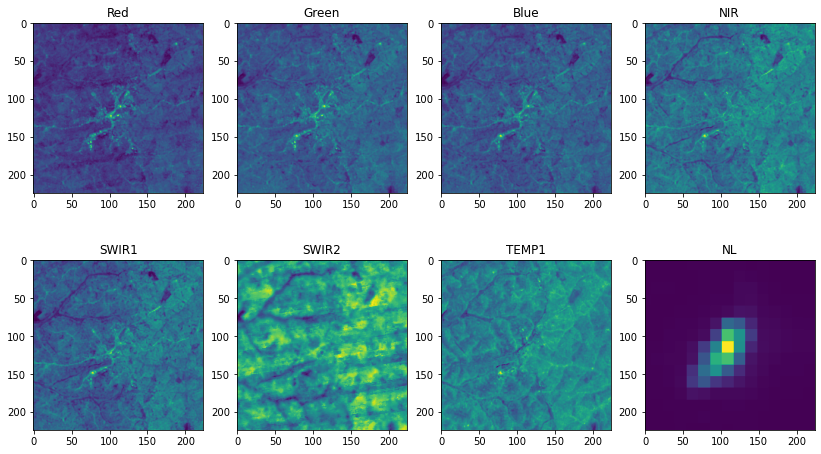

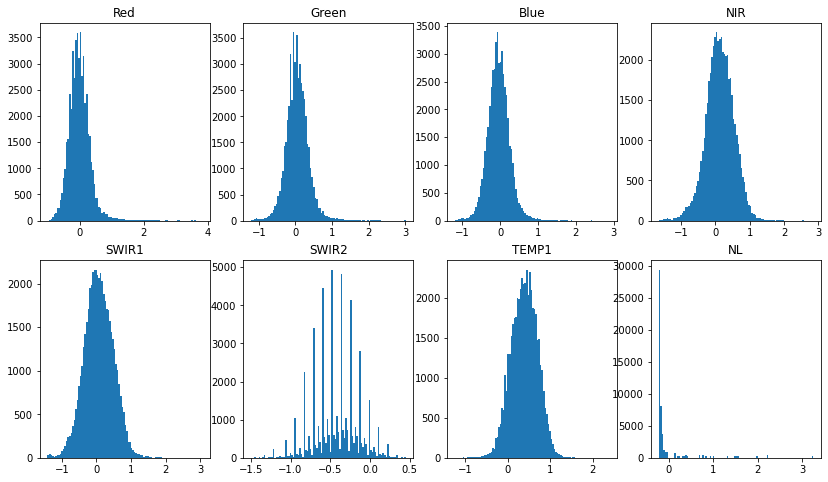

In [21]:
for n in range(10,100,10):
    filename=files[n]
    M=load(filename)
    Image=M['x']
    Image.shape

    S=Image[:3,:,:].flatten()
    _min=percentile(S,0.1)
    _max=percentile(S,99.9)
    #print('Image',_min,_max)
    
    R=zeros([224,224,3])
    for i in range(3):
        R[:,:,i]=(Image[i,:,:]-_min)/(_max-_min)
    #print('R',min(R.flatten()),max(R.flatten()))
    R[R>1]=1
    R[R<0]=0

    figure(figsize=[5,5])
    imshow(R)
    title(filename)
    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        imshow(Image[j,:,:])
        title(band_names[j])

    figure(figsize=[14,8])
    i=1
    for j in range(8):
        subplot(2,4,i)
        i+=1
        hist(Image[j,:,:].flatten(),bins=100)
        title(band_names[j])

In [15]:
max(R.flatten())

0.452706515789032